# 11.1 교차검증 모델 만들기

### 실전에서 모델이 얼마나 잘 작동할지 평가하고 싶을땐
#### 데이터 잔처리 파이프라인을 만들고 모델을 훈련한 후 교차검증으로 평가

In [1]:
import pandas as pd

In [2]:
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [12]:
# 숫자 데이터셋을 로드하기
digits = datasets.load_digits()

In [19]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [13]:
# 특성 행렬 만들기
features = digits.data

In [18]:
features[10:100]

array([[ 0.,  0.,  1., ...,  3.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  1.,  0.],
       [ 0.,  0.,  5., ..., 13., 12.,  4.],
       ...,
       [ 0.,  0.,  0., ...,  7.,  0.,  0.],
       [ 0.,  2., 15., ...,  5.,  0.,  0.],
       [ 0.,  0.,  1., ...,  3.,  0.,  0.]])

In [14]:
# 타깃 벡터 만들기
target = digits.target

In [17]:
target[10:100]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9,
       5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8,
       2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2,
       8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4,
       3, 1])

In [6]:
# 표준화 객체 만들기
standardizer = StandardScaler()

In [7]:
# 로지스틱 회귀 객체 만들기
logit = LogisticRegression()

In [8]:
# 표준화한 다음 로지스틱 회귀를 실행하는 파이프라인 만들기
pipeline = make_pipeline(standardizer, logit)

In [9]:
# k-폴드 교차검증 만들기
kf = KFold(n_splits=10, shuffle=True, random_state=1)

In [10]:
# k-폴드 교차검증 수행하기
cv_results = cross_val_score(pipeline, #파이프라인
                             features, #특성행렬
                             target, #타깃 벡터
                             cv = kf, #교차검증 기법
                             scoring='accuracy', # 평가 지표
                             n_jobs=-1 ) # 모든 CPU 코어 사용

In [11]:
# 평균 계산하기
cv_results.mean()

0.9693916821849783

### 데이터의 일부를 테스트용으로 떼어놓기(검증 validation 또는 홀드아웃 hold-out)
### 검증에서 샘플(특성과 타깃)은 두개의 세트로 나뉜다
#### 두개의 세트를 훈련세트(training set) 와 테스트세트(test set) 라 부름
#### 훈련 세트의 특성과 타깃 벡터를 사용해 최선의 예측 모델을 만들어 테스트 세트에 적용해 잘 되는지 평가함
### 두 가지 약점
#### 모델 성능은 테스트 세트로 나뉜 일부 샘플에 의해 결정됨
#### 전체 가용 데이터를 사용하여 모델을 훈련하고 테스트하지 못함

### K-폴드 교차검증(k-fold cross-validation) KFCV 은 단점을 극복할 좋은 방법
#### 데이터를 폴드(fold)라 부르는 k 개의 부분으로 나눔
#### k-1개 폴드를 하나의 훈련세트로 합쳐 훈련하고 남은 폴드를 테스트 세트 처럼 사용 
#### 이것을 k번 반복하고 반복마다 다른 폴드를 테스트 세트로 사용하기
#### k번 반복에서 얻은 모델 성능을 평균하여 최종 성능을 산출하기

### 위의 문제에선 10개의 폴드(n_split=10) 를 사용했고 cv_results에 저장되어있다

In [19]:
cv_results

array([0.97777778, 0.98888889, 0.96111111, 0.94444444, 0.97777778,
       0.98333333, 0.95555556, 0.98882682, 0.97765363, 0.93854749])

## KFCV를 사용할때 고려해야할 중요한점 3가지
### 1. KFCV는 각 샘플이 다른 샘플과 독립적으로  생성되었다고 가정 
#### 데이터는 독립 동일 분포(independent identically distributed  (IID) ) 
#### 데이터가 IID라면 폴드를 나누기 전에 샘플을 섞는 것이 좋은 생각이고 사이킷런에선 shuffle=TRUE 로 지정하여 섞을수있다

### 2. KFCV를 사용하여 분류기(classifier)를 평가할때, 각 타깃 클래스의 샘플이 거의 같은 비율로 폴드에 담기는것이 좋다. 
#### 이를 계층별 k-폴드 (stratified k-fold) 라 부름
#### 예를들어 성별 타깃 벡터 중에서 80% 샘플이 남성이면 각 폴드도 80% 남성과 20% 여성 샘플로 이루어져야 한다
#### 사이킷런에서는 KFold 클래스를 StratifiedKFold 로 바꾸어 계층별 k-폴드 교차검증 수행 가능

### 3. 검증 세트나 교차검증을 사용할때 훈련세트에서 데이터를 잔처리하고 이 변환을 훈련세트와 테스트 세트에 모두 적용하는 것이 중요
#### 예를 들면 표준화 객체(standardizer) 의 fit 메서드를 호출하여 훈련세트의 평균과 분산을 계산하기
#### 그 다음 이 변환을 transform 메서드를 사용해서 훈련 세트와 테스트 세트에 모두 적용하기

In [20]:
#라이브러리 임포트
from sklearn.model_selection import train_test_split

In [21]:
# 훈련세트와 테스트 세트 만들기
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.1, random_state=1)

In [22]:
# 훈련 세트로 standardizer 의 fit 메서드 호출하기
standardizer.fit(features_train)

StandardScaler()

In [23]:
# 훈련 세트와 테스트 세트에 모두 적용하기
features_train_std = standardizer.transform(features_train)
features_test_std = standardizer.transform(features_test)

#### 이렇게 하는 이유는 테스트 세트를 모르는 척 하기 위해서임
#### 이 전처리 객체를 훈련 세트와 테스트 세트에 있는 모든 샘플로 훈련한다면 테스트 세트의 정보가 훈련 세트로 유출된 것
#### 이규칙은 특성 선택 같은 모든 전처리 단계에 적용됨

### 사이킷런의 pipeline 패키지는 교차검증 기법을 사용할때 이 규칙을 손쉽게 구현할수 있도록 도와줌
#### 먼저 전처리(ex. standardizer)하고 모델(로지스틱 회귀인 logit)을 훈련하는 파이프라인 만들기

In [24]:
pipeline = make_pipeline(standardizer, logit)

#### 이 파이프라인으로 KFCV를 실행하면 사이킷런이 모든 작업을 알아서 처리

In [25]:
# k-폴드 교차검증 수행
cv_results = cross_val_score(pipeline,
                             features,
                             target,
                             cv=kf,
                             scoring='accuracy',
                             n_jobs=-1)

### cross_val_score 중요한 3개 매개변수
#### 1. cv 는 교차검증 기법 결정  (k-폴드가 가장 많이 사용)
#### LOOCV(leave-one-out-cross-validation)  ----폴드의 수 k 가 샘플의 개수와 동일 
#### 2. scoring 매개변수는 모델 성공의 측정 방법 결정
#### 3. n_jobs = -1 은 사이킷런에게 가용한 모든 코어를 사용하도록 지시
#### 예를들어 사용하는 컴퓨터에 네 개의 코어가 있다면 네 개의 코어를 동시에 사용해 작업의 속도를 높인다

#### ShuffleSplit 이나 RepeatedKFold 도 존재

# 11.2 기본 회귀 모델 만들기

### 다른 모델과 비교하기 위해 간단한 기본 회귀 모델을 만들땐
#### 사이킷런의 DummyRegressor를 사용하여 기본 모델로 사용할 간단한 더미 모델 만들기

In [21]:
from sklearn.datasets import load_boston
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

In [22]:
# 데이터 로드
boston = load_boston()

In [23]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [28]:
# 특성 만들기
features, target = boston.data, boston.target

In [29]:
# 훈련세트, 테스트 세트 나누기
features_train, features_test, target_train, target_test = train_test_split(features,target,random_state=0)

In [31]:
# 더미 회귀 모델 만들기
dummy = DummyRegressor(strategy='mean')

In [32]:
# 더미 회귀 모델 훈련시키기
dummy.fit(features_train, target_train)

DummyRegressor()

In [33]:
# R^2 점수 계산하기
dummy.score(features_test, target_test)

-0.001119359203955339

#### 다른 모델을 훈련하고 평가하여 성능 점수 비교하기

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
#간단한 선형 회귀 모델 훈련하기
ols = LinearRegression()
ols.fit(features_train, target_train)

LinearRegression()

In [36]:
#R^2 점수 계산하기
ols.score(features_test,target_test)

0.6354638433202118

### DummyRegressor 클래스는 strategy 매개변수를 사용해 예측 방법 지정
#### 훈련 세트의 평균 또는 중간값 사용가능
#### strategy 를 constant 로 지정하고 constant 매개변수를 사용하면 모든 샘플에 대해 일정한 값으로 예측하는 더미 예측 회귀 모델 만듦

In [39]:
# 모든 샘플에 대해 20으로 예측하는 더미 회귀 모델 만들기
clf = DummyRegressor(strategy='constant', constant=20)
clf.fit(features_train,target_train)

DummyRegressor(constant=array(20), strategy='constant')

In [40]:
clf.score(features_test,target_test)

-0.06510502029325727

### score 메서드 
#### 결정계수 (coefficient of determination) R^2 값을 반환
#### yi 는 샘플의 정답 타깃값 , yi^ 은 예측값 , y-- 은 타깃 벡터의 평균값 
#### R^2 이 1 에 가까울수록 특성이 타깃 벡터의 분산을 잘 설명하는것

### 결정계수 (R^2)
#### 회귀 모델에서 독립변수가 종속변수를 얼마만큼 설명해주는지를 나타내는 지표 (설명력)
#### 결정계수가 높을수록 종속변수를 많이 설명해준다는 뜻인데 이 계수는 독립변수의 수가 증가하면 상승함
#### 실제로 종속변수를 잘 설명하지 못하는 변수가 추가되어도 증가하기때문에 결정계수만 가지고 회귀모델의 유용성을 판단하는데는 문제가있다
#### 그럴땐, 조정된 결정계수(Adjusted R-Squared) 를 씀

# 11.3 기본 분류 모델 만들기

### 다른 모델과 비교하기 위해 간단한 기본 회귀 모델을 만들땐
#### 사이킷런의 DummyClassifier 사용

In [41]:
from sklearn.datasets import load_iris
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

In [42]:
#데이터 로드
iris = load_iris()

In [43]:
#타깃 벡터와 특성 행렬 만들기
features, target = iris.data, iris.target

In [44]:
#훈련 세트, 테스트 세트
features_train, features_test, target_train, target_test = train_test_split(features,target,random_state=0)

In [45]:
#더미 분류 모델
dummy = DummyClassifier(strategy='uniform', random_state=1)

In [46]:
#모델 훈련
dummy.fit(features_train, target_train)

DummyClassifier(random_state=1, strategy='uniform')

In [47]:
#정확도 점수
dummy.score(features_test,target_test)

0.42105263157894735

#### 훈련된 다른 모델과 기본 모델을 비교하여 더 나은지 확인하기

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
#분류 모델
classifier = RandomForestClassifier()

In [50]:
#모델 훈련
classifier.fit(features_train, target_train)

RandomForestClassifier()

In [51]:
#정확도 점수
classifier.score(features_test, target_test)

0.9736842105263158

### strategy 매개변수 --- 예측값을 생성하는 여러 가지 옵션 제공
#### 1. stratified 옵션 ---- 훈련 세트에 있는 타깃 벡터의 클래스 비율에 비례하는 예측 만듦
#### 훈련 세트에서 샘플의 20%가 여성이라면 DummyClassifier는 20%를 여성으로 예측
#### 2. uniform 옵션 ---- 클래스 비중이 균등하도록 랜덤하게 예측
#### 샘플의 20%가 여성이고 80%가 남성일때, uniform 옵션은 50%는 여성, 50%는 남성으로 예측
#### 3. most_frequent 옵션 ---- 무조건 훈련 세트에서 가장 많은 타깃 레이블로 예측 

In [62]:
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(features_train, target_train)

DummyClassifier(strategy='most_frequent')

In [63]:
dummy.predict(features_test)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [55]:
import numpy as np

In [59]:
np.bincount(target_train)

array([37, 34, 41], dtype=int64)

# 11.4 이진 분류기의 예측 평가하기

### 훈련된 분류 모델의 품질을 평가하고 싶을땐
#### 사이킷런의 cross_val_score 함수를 사용하여 교차검증을 수행할때 scoring 매개변수에 성능지표중 하나 선택(정확도,정밀도,재현율,F1)

### 1) 정확도 accuracy_score  ---- 예측한 값과 실제값 간에 얼마나 정확하게 예측했는지에 대한 확률 값
#### 정확도 = (TP +TN) / (TP + TN +FP +FN)
#### TP(True Positive)  ----- 진짜 양성 개수.  예측한 값과 실제 값이 모두 1로 같은 경우  (질병에 걸렸다고 예측했는데 실제로도 질병에 걸림)
#### TN(True Negative) ----- 진짜 음성 개수.  예측한 값과 실제 값이 모두 0으로 같은 경우 (질병에 걸리지 않았다 예측했고 실제로도 그럼)
#### FP(False Positive) ----- 거짓 양성 개수. 타입 1 에러(type 1 error) 라고도 부름. 예측값이 1 일때 실제값이 0 인경우. 
#### FN(False Negative) ----- 거짓 음성 개수. 타입 2 에러(type 2 error) 라고도 부름. 예측값이 0 일때 실제값이 1 인경우.
### 무조건 예측값을 기준으로 생각하기. 예측값이 0이면 Negative, 1이면 Positive. 실제랑 같으면 True, 실제랑 틀리면 False 

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

In [16]:
# 특성 행렬과 타깃 벡터를 만들기
X, y = make_classification(n_samples=10000,
                           n_features=3,
                           n_informative=3,
                           n_redundant = 0,
                           n_classes=2,
                           random_state=1)

In [21]:
# 로지스틱 회귀 모델 만들기
logit = LogisticRegression()

In [22]:
#정확도를 사용하여 교차검증 수행
cross_val_score(logit,X,y,scoring='accuracy')

array([0.9555, 0.95  , 0.9585, 0.9555, 0.956 ])

#### 정확도는 직관적이고 쉽게 설명할수있지만 imbalanced data(불균형 데이터) 를 처리할땐 문제가 발생
#### 이미 99%가 0 이고 1%가 1인 데이터가 있을때 모델링해서 정확도 95%인 모델을 만들었을때, 그냥 모든 결과값이 0인 식을 넣으면 정확도 99%인 값을 얻게된다.  이런 이유로 정밀도,재현율,F1 점수 를 이용

### 2) 정밀도  precision
#### 우리가 1(양성) 이라고 예측한 것들 중에 실제로 얼마나 많은 값을 맞춰냈는가. 
#### TP / (TP + FP)   


In [23]:
# 정밀도를 사용한 교차검증
cross_val_score(logit, X,y, scoring='precision')

array([0.95963673, 0.94820717, 0.9635996 , 0.96149949, 0.96060606])

### 3) 재현율 recall
#### 실제로 1 인 것들 중에서 우리가 얼마나 많은 1을 찾아냈는가
#### TP / (TP + FN)


In [24]:
# 재현율을 사용한 교차검증
cross_val_score(logit,X,y,scoring='recall')

array([0.951, 0.952, 0.953, 0.949, 0.951])

### 정밀도와 재현율은 상충관계.
####  모델을 평가할때 한가지만 보지말고 둘다 보고 평가해야함
#### 하나의 값이 극단적으로 큰것보단 두 개의 값이 적당한 조화를 이루는게 좋은 모델

### 4) F1 
#### 정밀도와 재현율의 조화 평균(harmonic mean)
#### 불균형 데이터인지 구분할때 사용됨
#### 2 X [ (정밀도 X 재현율) / (정밀도 + 재현율) ] 

In [26]:
#f1 점수를 사용한 교차검증
cross_val_score(logit,X,y,scoring='f1')

array([0.95529884, 0.9500998 , 0.95827049, 0.95520886, 0.95577889])

#### cross_val_score 대신 진짜 y값과 예측한 y값이 있으면 직접 정확도와 재현율 계산 가능

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [28]:
# 훈련세트와 테스트세트 나누기
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.1,
                                                    random_state=1)

In [29]:
# 테스트 세트의 예측 만들기
y_hat = logit.fit(X_train,y_train).predict(X_test)

In [30]:
# 정확도
accuracy_score(y_test,y_hat)

0.947

# 11.5 이진 분류기 임곗값 평가하기

### 이진 분류기를 여러 가지 확률 임계값으로 평가하고 싶을땐
#### ROC(receiving operating characteristic) 곡선 이용하기

### ROC 곡선은 이진 분류기의 품질을 평가하는데 널리 사용됨. 모델 성능 확인
#### 확률 임계값(즉 어떤 샘플을 한 클래스로 예측할 확률)마다 진짜 양성과 거짓 양성 개수 비교
#### ** 모든 샘플을 올바르게 예측하는 분류기는 밝은 회색 실선처럼 바로 수직으로 꼭대기까지 올라감
#### ** 랜덤하게 예측하는 분류기는 대각선으로 나타냄
#### ** 좋은 모델일수록 실선에 가까움
#### 사이킷런에서 roc_curve 함수를 사용하여 임계값마다 진짜 양성과 거짓양성을 계산하여 그래프 그리기

In [32]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

In [34]:
# 특성 행렬과 타깃 벡터 만들기
features, target = make_classification(n_samples=10000,
                                       n_features=10,
                                       n_classes=2,
                                       n_informative=3,
                                       random_state=3)

In [36]:
features_train,features_test,target_train,target_test = train_test_split(features,target,test_size=0.1, random_state=1)

In [37]:
logit = LogisticRegression()

In [38]:
logit.fit(features_train, target_train)

LogisticRegression()

In [59]:
# 예측 확률 계산하기\
target_probabilities = logit.predict_proba(features_test)[:,1]

In [60]:
# 진짜 양성 비율과 거짓 양성 비율 계산하기
false_positive_rate, true_positive_rate, threshold=roc_curve(target_test, target_probabilities)

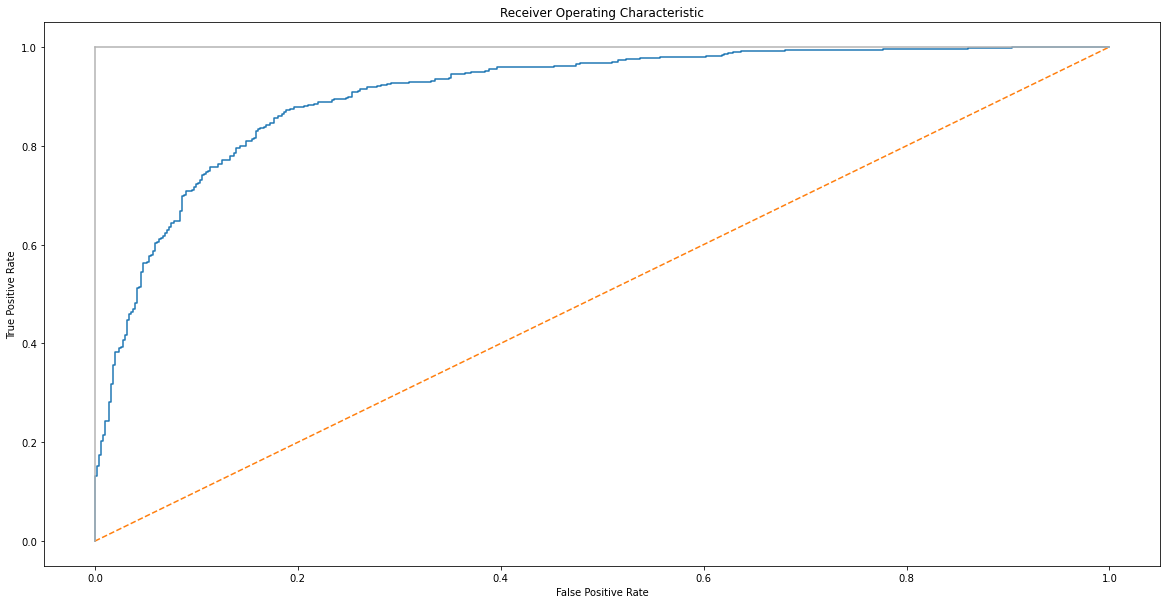

In [61]:
# ROC 곡선 그리기
plt.figure(figsize=(20,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1], ls='--')
plt.plot([0,0],[1,0],c='.7'), plt.plot([1,1],c='.7')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 머신러닝 알고리즘은 확률을 기반으로 예측값을 만듬
#### 모든 샘플은 각 클래스에 속할 명시적인 확률이 주어짐
#### predict_proba 메서드로 첫번째 샘플에 대한 예측확률 확인 가능

In [55]:
# 예측 확률 가능
logit.predict_proba(features_test)[0:1]

array([[0.86891533, 0.13108467]])

In [57]:
# 클래스 확인하기
logit.classes_

array([0, 1])

#### 첫번째 샘플은 음성 클래스(0) 이 될 가능성 87%, 양설 클래스(1) 가능성 13%.
#### 기본적으로 사이킷런은 확률이 0.5 (임계값) 보다 크면 양성 클래스로 예측

#### 실제 필요에 의해 중간값보다 다른 임계값을 사용해 모델을 편향되게 만들어야 될때가 있음
#### 예를들어, 거짓 양성(FP)이 회사에 매우 큰 비용을 치르게 한다면 확률 임계값이 높은 모델 선호
#### 일부 양성 샘플을 예측하지 못할 수 있지만 양성으로 예측된 샘플은 이 예측이 맞을 것이라고 강하게 확신 가능

#### 진짜 양성비율(TPR) 과 거짓 양성 비율(FPR) 사이의 트레이드오프 (상충관계)

### 진짜 양성 비율(TPR)  = 민감도(Sensitivity)
#### 올바르게 예측된 양성 샘플 개수를 전체 진짜 양성 샘플의 수로 나눈 것
#### 진짜 양성 / (진짜 양성 + 거짓 음성)
#### TP / P

### 거짓 양성 비율(FPR)
#### 잘못 예측된 양성 클래스 개수를 모든 진짜 음성 클래스 샘플수로 나눈 것
#### 거짓 양성 / (거짓 양성 + 진짜 음성)
#### FP / N

#### 먼저, 10명의 암 의심 환자가 있는데 여기서 3명만이 실제 암에 걸렸다고 가정해 봅시다(P = 3). 그 외 7명은 암에 걸리지 않았습니다(N = 7). 병원에서 10명의 환자에 대한 진단을 해서 3명의 암환자가 있다고 결론을 내렸습니다. 하지만 여기서 실제 암환자는 2명뿐입니다(TP = 2). 그렇다면 실제 양성 비율 TPR = TP/P = 2/3을 계산할 수 있습니다. 불행하게도, 7명의 암에 걸리지 않은 환자들 중 한 명이 오진을 받았습니다(FP = 1). 그렇다면 거짓 양성 비율 FPR = FP/N = 1/7을 계산할 수 있습니다. 해당 병원의 진단 자체를 하나의 분류기로 생각한다면, 이 분류기의 분류 결과는 ROC 곡선상의 점 (1/7, 2/3)이 됩니다.

### AUCROC (ROC 곡선 아래 면적)   (Area Under the Curve)
#### 좋은 모델일수록 곡선이 위로 올라가므로 곡선 아래 면적이 커짐.
#### AUCROC 가 1 에 가까울수록 더 좋은 모델.
#### 사이킷런에서 roc_auc_score 함수로 계산

In [62]:
# AUCROC 계산
roc_auc_score(target_test, target_probabilities)

0.9073389355742297

# 11.6 다중클래스 분류기 예측 평가하기

### 세 개 이상의 클래스를 예측하는 모델의 성능을 평가하고싶을땐
#### 두 개 이상의 클래스를 다룰 수 있는 평가 지표로 교차검증을 수행하기

In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

In [64]:
# 특성 행렬과 타깃 벡터 만들기
features, target = make_classification(n_samples=10000,
                                       n_features=3,
                                       n_informative=3,
                                       n_redundant=0,
                                       n_classes=3,
                                       random_state=1)

In [65]:
logit = LogisticRegression()

In [66]:
cross_val_score(logit,features,target,scoring='accuracy')

array([0.841 , 0.829 , 0.8265, 0.8155, 0.82  ])

#### 클래스가 균형 잡혀 있을때(예를들어 타깃 벡터의 클래스에 속한 샘플 개수가 거의 동일할때)

#### 다중클래스에서도 하나의 클래스만 있는것처럼 각 클래스에서 측정한 값을 수집하여 평균값으로써 전체 클래스에 대한 평가 점수 얻기가능

In [67]:
# 마크로 평균 F1 점수를 사용하여 교차검증 수행하기
cross_val_score(logit, features, target, scoring='f1_macro')

array([0.84061272, 0.82895312, 0.82625661, 0.81515121, 0.81992692])

#### *** macro ---- 각 클래스를 동등한 가중치로 클래스별 측정 점수를 평균
#### *** weighted ---- 샘플 개수에 비례하여 각 클래스별 측정 점수를 평균
#### *** micro ---- 클래스별 TP, TN , FP , FN 을 모두 더하여 계산

### 11.7 분류기 성능 시각화하기
예측 클래스와 진짜 클래스 비교 시각화

In [ ]:
#import
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

In [ ]:
iris = datasets.load_iris()
features = iris.data
target = iris.target
class_names = iris.target_names
class_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
#훈련 세트와 테스트 세트 생성
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=1)

#Logistic Regression
classifier = LogisticRegression()

target_predicted = classifier.fit(features_train, target_train).predict(features_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


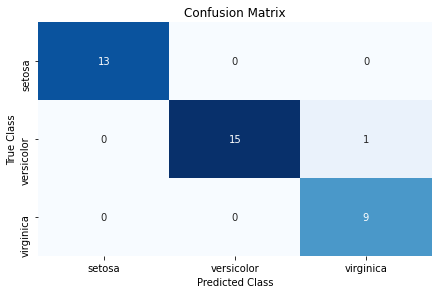

In [ ]:
#오차 행렬
matrix = confusion_matrix(target_test, target_predicted)

#Pandas 데이터프레임
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

#히트맵 생성
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

- 완벽한 모델: 대각선 값만 가짐
- 모델이 어떻게 나쁜지 알려줌
- 다중 클래스 환경에도 동작(아이리스의 경우 3개)


In [ ]:
#오차 행렬 계산 가능
confusion_matrix(target_test, target_predicted)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

### 11.8 회귀 모델 성능 평가 

In [ ]:
#MSE: mean squared error 평균 제곱 오차

from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression


In [ ]:
features, target = make_regression(n_samples = 100,
                                   n_features = 3,
                                   n_informative = 3,
                                   n_targets = 1,
                                   noise = 50,
                                   coef = False,
                                   random_state = 1)

ols = LinearRegression()
cross_val_score(ols, features, target, scoring='neg_mean_squared_error')

array([-1974.65337976, -2004.54137625, -3935.19355723, -1060.04361386,
       -1598.74104702])

[scoring parameter lists](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)

- MSE: 작을수록 좋다
- 'neg_mean_squared_error' 사용 이유
  - 보통의 경우 높은 결과값이 좋은 것이여야 함 -> higher score, the better  
  - MSE 의 경우 higher score, the worse
  - Negative를 붙여 보정

- R<sup>2</sup> : how close the data are to the fitted regression line
  - 1.0: perfect, 0.0: none
  - 1 - (ΣSquared Error / Σ(Real data - target mean))

### 11.9 군집 모델 평가하기
clustering 품질 측정: silhouette coefficients(실루엣 계수)

In [ ]:
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [ ]:
featrues, _ = make_blobs(n_samples = 1000,
                         n_features = 10,
                         centers = 2,
                         cluster_std = 0.5,
                         shuffle = True,
                         random_state = 1)

model = KMeans(n_clusters=2, random_state=1).fit(features)

target_predicted = model.labels_

silhouette_score(features, target_predicted)

0.23302675510839016

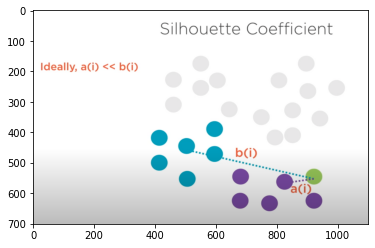

In [ ]:
import cv2 
from matplotlib import pyplot as plt
image = cv2.imread("./sample_data/SC.png", cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()

- silhouette coefficient
  - i : 하나의 샘플
  - a(i): 같은 샘플 안의 평균 거리
  - b(i): 가장 가까운 다른 클러스터안에 있는 샘플과의 평균 거리
  - -1 <= SC <= 1

### 11.10 사용자 정의 평가 지표 만들기


In [ ]:
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression

features, target = make_regression(n_samples = 100, 
                                   n_features = 3,
                                   random_state = 1)
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.1, random_state=1)

In [ ]:
# 사용자 정의 지표 
# input: 정답, 예측값
def custom_metric(target_test, target_predicted):
  print(target_test.shape)
  print(target_predicted.shape)
  r2 = r2_score(target_test, target_predicted)
  return r2

In [ ]:
# make_scorer 함수
score = make_scorer(custom_metric, greater_is_better=True)

In [ ]:
classifier = Ridge()
model = classifier.fit(features_train, target_train)
score(model, features_test, target_test)

(10,)
(10,)


0.9997906102882058

### 11.11 훈련세트 크기에 따른 영향 시각화
Learning Curve

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve

In [ ]:
digits = load_digits()
features, target = digits.data, digits.target
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(),
                                                        features,
                                                        target,
                                                        #k fold
                                                        cv=10,
                                                        scoring='accuracy',
                                                        n_jobs=-1,
                                                        train_sizes=np.linspace(
                                                            0.01,
                                                            1.0,
                                                            50
                                                        ))

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

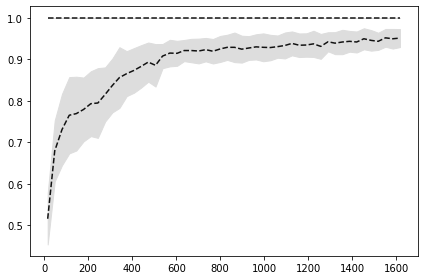

In [ ]:
#Plot Graph
plt.plot(train_sizes, train_mean, '--', color='#111111', label="Training Score")
plt.plot(train_sizes, test_mean, '--', color='#111111', label="Cross-Val Score")

plt.fill_between(train_sizes, train_mean-train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean-test_std, test_mean + test_std, color="#DDDDDD")

plt.tight_layout()
plt.show()

추가적인 데이터가 더 필요한지 판단

### 11.12 평가 지표 리포트 만들기 
성능 간단 요약

In [ ]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
iris = datasets.load_iris()
features = iris.data
target = iris.target
class_names = iris.target_names

In [ ]:
#훈련 세트와 테스트 세트 생성
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=1)

#Logistic Regression
classifier = LogisticRegression()

target_predicted = classifier.fit(features_train, target_train).predict(features_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
print(classification_report(target_test, target_predicted, target_names=class_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



### 11.13 하이퍼파라미터 값의 영향을 시각화하기
하이퍼파라미터 값의 변화에 따른 성능 변화: Validation curve

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

In [ ]:
digits = load_digits()
features, target = digits.data, digits.target

param_range = np.arange(1, 10000, 2)

train_scores, test_scores = validation_curve(RandomForestClassifier(),
                                             features,
                                             target,
                                             #조사할 하이퍼파라미터
                                             param_name="n_estimators",
                                             param_range = param_range,
                                             #k fold
                                             cv=3,
                                             scoring='accuracy',
                                             n_jobs=-1,
                                             )

KeyboardInterrupt: ignored

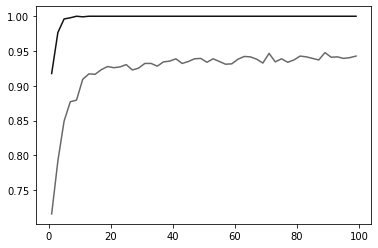

In [ ]:
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, label="Training Score", color="#111111")
plt.plot(param_range, test_mean, label="Cross-Val Score", color='dimgrey')

# plt.fill_between(param_range, train_mean-train_std, train_mean + train_std, color="#DDDDDD")
# plt.fill_between(param_range, test_mean-test_std, test_mean + test_std, color="#DDDDDD")

In [ ]:
a = RandomForestClassifier()
param_range

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99])

validation curve function
- param_name: name of hyperparameter to vary
- param_range: range of the hyperparameter
- scoring